Dataset Location

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical

2023-12-27 09:43:58.743044: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-27 09:43:58.747117: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-27 09:43:58.805822: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-27 09:43:58.805863: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-27 09:43:58.807306: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

#### Load the data

In [2]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [3]:
test_datagen = ImageDataGenerator(rescale=1/255)

In [4]:
train = train_datagen.flow_from_directory('/home/dai/Downloads/archive/PetImages', class_mode = 'binary', target_size=(64,64))

Found 25000 images belonging to 2 classes.


In [5]:
# test = test_datagen.flow_from_directory('Dog&Cat/test_set', class_mode = 'binary', target_size=(64,64))

#### Build the model

In [6]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3,3), input_shape = (64,64,3), activation = 'relu'))

model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters = 8, kernel_size = (3,3), activation = 'relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 8)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 16)                2

#### Compile the model

In [8]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [10]:
model.fit(train, epochs=10, batch_size=10)

Epoch 1/10
224/782 [=======>......................] - ETA: 3:53 - loss: 0.6426 - accuracy: 0.6394

2023-12-27 09:48:11.115610: W tensorflow/core/framework/op_kernel.cc:1827] UNKNOWN: UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7f42d9993100>
Traceback (most recent call last):

  File "/home/dai/anaconda3/envs/NLP/lib/python3.11/site-packages/tensorflow/python/ops/script_ops.py", line 270, in __call__
    ret = func(*args)
          ^^^^^^^^^^^

  File "/home/dai/anaconda3/envs/NLP/lib/python3.11/site-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "/home/dai/anaconda3/envs/NLP/lib/python3.11/site-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/home/dai/anaconda3/envs/NLP/lib/python3.11/site-packages/keras/src/engine/data_adapter.py", line 917, in wrapped_generator
    for data in gener

UnknownError: Graph execution error:

Detected at node PyFunc defined at (most recent call last):
<stack traces unavailable>
UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7f42d9993100>
Traceback (most recent call last):

  File "/home/dai/anaconda3/envs/NLP/lib/python3.11/site-packages/tensorflow/python/ops/script_ops.py", line 270, in __call__
    ret = func(*args)
          ^^^^^^^^^^^

  File "/home/dai/anaconda3/envs/NLP/lib/python3.11/site-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "/home/dai/anaconda3/envs/NLP/lib/python3.11/site-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/home/dai/anaconda3/envs/NLP/lib/python3.11/site-packages/keras/src/engine/data_adapter.py", line 917, in wrapped_generator
    for data in generator_fn():

  File "/home/dai/anaconda3/envs/NLP/lib/python3.11/site-packages/keras/src/engine/data_adapter.py", line 1064, in generator_fn
    yield x[i]
          ~^^^

  File "/home/dai/anaconda3/envs/NLP/lib/python3.11/site-packages/keras/src/preprocessing/image.py", line 116, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/home/dai/anaconda3/envs/NLP/lib/python3.11/site-packages/keras/src/preprocessing/image.py", line 370, in _get_batches_of_transformed_samples
    img = image_utils.load_img(
          ^^^^^^^^^^^^^^^^^^^^^

  File "/home/dai/anaconda3/envs/NLP/lib/python3.11/site-packages/keras/src/utils/image_utils.py", line 423, in load_img
    img = pil_image.open(io.BytesIO(f.read()))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/home/dai/anaconda3/envs/NLP/lib/python3.11/site-packages/PIL/Image.py", line 3280, in open
    raise UnidentifiedImageError(msg)

PIL.UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7f42d9993100>


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_1323]

In [ ]:
train.class_indices

{'cat': 0, 'dog': 1}

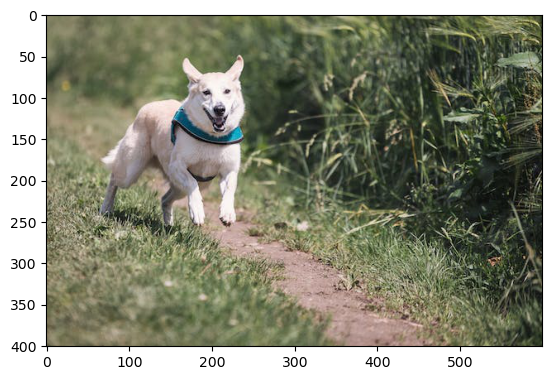

In [ ]:
sample1 = plt.imread('Dog&Cat/sample1.jpeg')
plt.imshow(sample1)

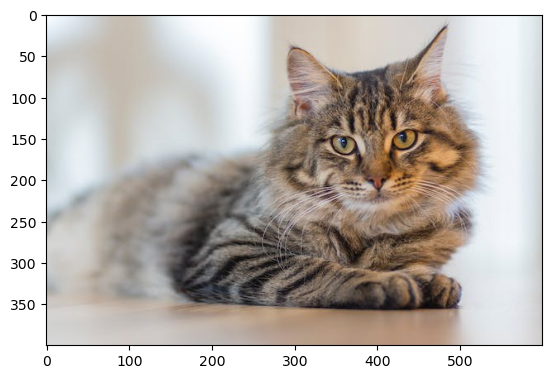

In [ ]:
sample2 = plt.imread('Dog&Cat/sample2.jpeg')
plt.imshow(sample2)

In [ ]:
import cv2

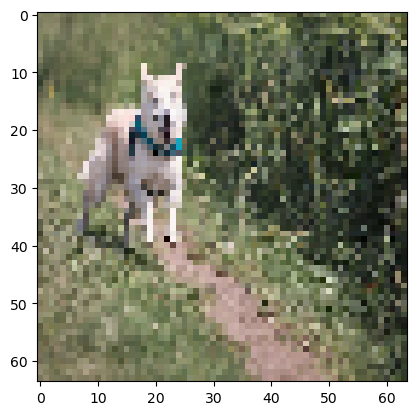

In [ ]:
sample1 = cv2.resize(sample1, (64,64))
plt.imshow(sample1)

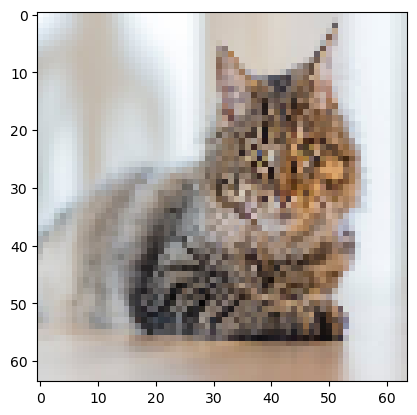

In [ ]:
sample2 = cv2.resize(sample2, (64,64))
plt.imshow(sample2)

In [ ]:
sample1.shape

(64, 64, 3)

In [ ]:
train.class_indices

{'cat': 0, 'dog': 1}

In [ ]:
def prediction(img):
    img = cv2.resize(img, (64,64))
    img = img.reshape(1,64,64,3)
    prediction = model.predict(img)
    if prediction > 0.5:
        return('Cat')
    else:
        return('Dog')

In [ ]:
prediction(sample1)

1/1 [==============================] - 0s 28ms/step


'Cat'

In [ ]:
prediction(sample2)

1/1 [==============================] - 0s 37ms/step


'Cat'

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
test_image = load_img('Dog&Cat/sample1.jpeg', target_size=(64,64))

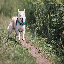

In [ ]:
test_image


In [ ]:
test_image = img_to_array(test_image)

In [ ]:
test_image = np.expand_dims(test_image, axis=0)

In [ ]:
test_image.shape

(1, 64, 64, 3)

In [ ]:
def predict(img):
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    if prediction > 0.5:
        return('Cat')
    else:
        return('Dog')

In [ ]:
test_image = load_img('Dog&Cat/sample1.jpeg', target_size=(64,64))
predict(test_image)

1/1 [==============================] - 0s 27ms/step


'Cat'

In [ ]:
test_image = load_img('Dog&Cat/sample2.jpeg', target_size=(64,64))
predict(test_image)

1/1 [==============================] - 0s 28ms/step


'Cat'